# Analysis by Prisca Ukanwa

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Fraud.csv')

In [4]:
## project aim: Predict whether a transaction is fraudulent or not based on available data.
## and to build  a classification model where the target variable indicates if a transaction is fraud (1) or not (0).

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.columns=['step', 'transaction_type', 'trans_amount', 'trans_origin', 'bal_before_trans', 'bal_after_trans',
       'trans_recipient', 'bal_before_trans_recip', 'bal_after_trans_recip', 'isFraud',
       'isFlaggedFraud'] # columns modifications for easy understanding.

In [8]:
# checking for missing values
missing_val=df.isnull().sum()
len(missing_val) # 11 missing value found

11

In [9]:
df.dropna(inplace=True) # droping missing values because it wont affect my data, no need for imputation

In [10]:
# cheecking for duplicates
df_dup=df.duplicated().sum()
df_dup # no duplicates found

0

In [11]:
df.shape # data size

(138115, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138115 entries, 0 to 138114
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   step                    138115 non-null  int64  
 1   transaction_type        138115 non-null  object 
 2   trans_amount            138115 non-null  float64
 3   trans_origin            138115 non-null  object 
 4   bal_before_trans        138115 non-null  float64
 5   bal_after_trans         138115 non-null  float64
 6   trans_recipient         138115 non-null  object 
 7   bal_before_trans_recip  138115 non-null  float64
 8   bal_after_trans_recip   138115 non-null  float64
 9   isFraud                 138115 non-null  float64
 10  isFlaggedFraud          138115 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.6+ MB


In [13]:
df['trans_origin'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2063932957',
       'C850779719', 'C1697243396'], dtype=object)

In [14]:
df['bal_before_trans'].unique()

array([1.7013600e+05, 2.1249000e+04, 1.8100000e+02, ..., 3.7236943e+05,
       2.6154078e+05, 9.3363190e+04])

In [15]:
imbal=df['isFraud'].value_counts() # checking for imbalance in data, it is discovered that this data is imbalance

<Axes: xlabel='isFraud', ylabel='count'>

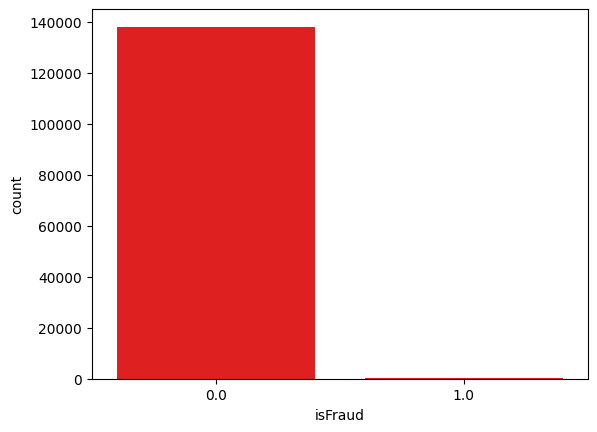

In [16]:
sns.barplot(imbal,color='red')
# visualizing imbalance data,
## from this chart, 0 wich is non fraud dominant in this categorical column

In [17]:
trans_val=df['transaction_type'].value_counts()

<Axes: xlabel='transaction_type', ylabel='count'>

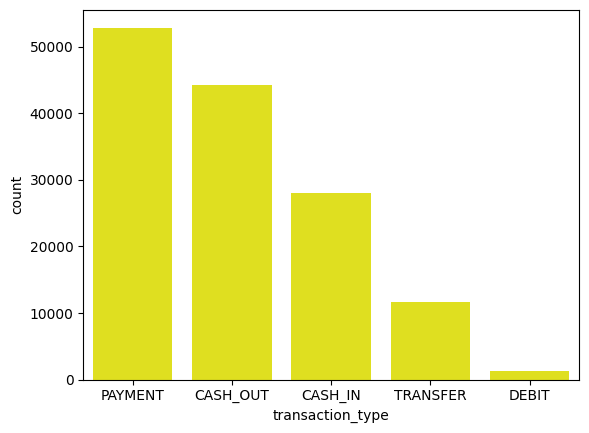

In [18]:
sns.barplot(trans_val,color='yellow')

In [20]:
df_res=df.copy() # duplicating the data frame to maintain its original state

# outliers

<Axes: >

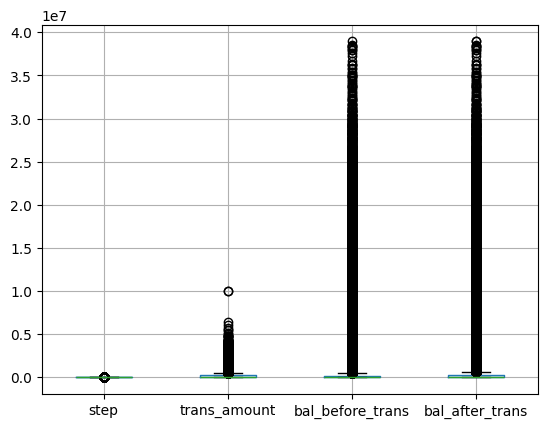

In [21]:
df_res.boxplot(column=['step', 'trans_amount', 'bal_before_trans', 'bal_after_trans']) # checking for outlier
## outliers found

<Axes: >

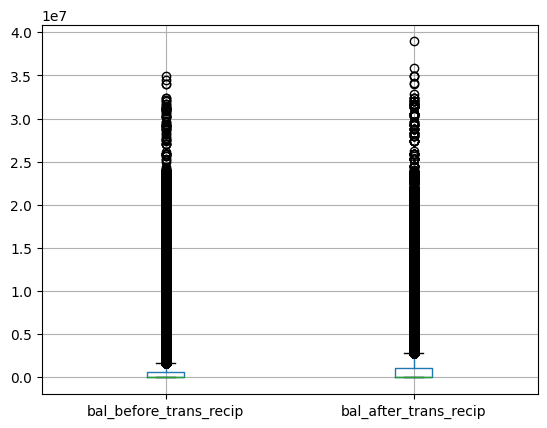

In [22]:
df_res.boxplot(column=['bal_before_trans_recip', 'bal_after_trans_recip'])

In [23]:
# handling the outliers  by capping

In [24]:
q1=df_res['trans_amount'].quantile(0.25)
q3=df_res['trans_amount'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower # determining the upper and lower band using inter_quartile method

(536380.5499999999, -304405.00999999995)

In [25]:
# filtering the outlier
amount_out=df_res.loc[(df_res['trans_amount'] > upper)|(df_res['trans_amount'] < lower)]
len(amount_out)

8586

In [26]:
#capping this outlier
df_res.loc[(df_res['trans_amount']>upper),'trans_amount']=upper
df_res.loc[(df_res['trans_amount']<lower),'trans_amount']=lower

<Axes: ylabel='trans_amount'>

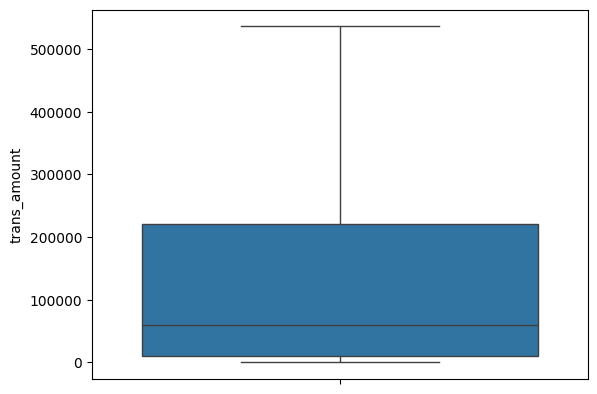

In [27]:
sns.boxplot(df_res['trans_amount'])
# outlier handled in the column :'trans_amount'

In [28]:
# determining the upper and lower bound for column: 'bal_after_trans'
q1=df_res['bal_before_trans'].quantile(0.25)
q3=df_res['bal_before_trans'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower # determining the upper and lower band using inter_quartile method

(490774.9000000001, -294464.94000000006)

In [29]:
# filte ring outlier for column: 'bal_before_trans'
bal_before_trans=df_res.loc[(df_res['bal_before_trans'] > upper)|(df_res['bal_before_trans'] < lower)]
len(bal_before_trans)

25053

In [30]:
# capping outlier for column: 'bal_after_trans'
df_res.loc[(df['bal_before_trans']>upper),'bal_before_trans']=upper
df_res.loc[(df['bal_before_trans']<lower),'bal_before_trans']=lower

Text(0.5, 1.0, 'bal_befor_tans')

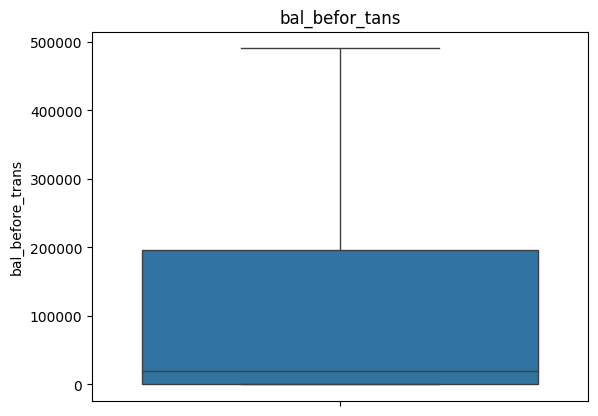

In [31]:
# revisualizing the outlier for column:'bal_after_trans'
sns.boxplot(df_res['bal_before_trans'])
plt.title('bal_befor_tans')

In [32]:
# determining the upper and lower bound for column: 'bal_after_trans'
q1=df_res['bal_after_trans'].quantile(0.25)
q3=df_res['bal_after_trans'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower # determining the upper and lower band using inter_quartile method

(561885.325, -337131.195)

In [33]:
# filtering outlier for column: 'bal_after_trans'
bal_after_trans=df_res.loc[(df_res['bal_after_trans'] > upper)|(df_res['bal_after_trans'] < lower)]
len(bal_after_trans)

23931

In [34]:
# capping outlier for column: 'bal_after_trans'
df_res.loc[(df_res['bal_after_trans']>upper),'bal_after_trans']=upper
df_res.loc[(df['bal_after_trans']<lower),'bal_after_trans']=lower

Text(0.5, 1.0, 'bal_after_trans')

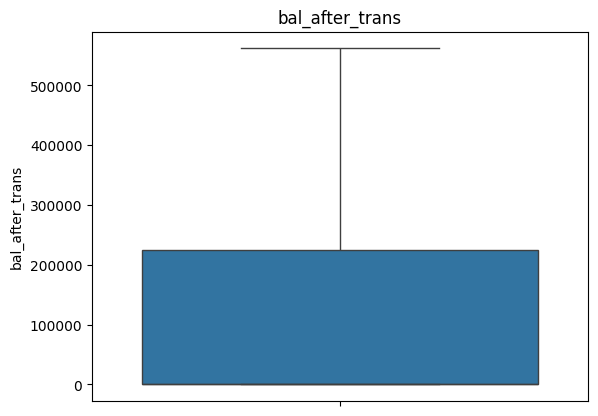

In [35]:

# revisualization of outlier for column: 'bal_after_trans'
sns.boxplot(df_res['bal_after_trans'])
plt.title('bal_after_trans')

In [36]:
# determining the upper and lower bound for column: 'bal_before_trans_recip'
q1=df_res['bal_before_trans_recip'].quantile(0.25)
q3=df_res['bal_before_trans_recip'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower # determining the upper and lower band using inter_quartile method

(1666728.1375000002, -1000036.8825000001)

In [37]:
# filtering outlier for column: 'bal_before_trans_recip'
bal_before_trans_recip=df_res.loc[(df_res['bal_before_trans_recip'] > upper)|(df_res['bal_before_trans_recip'] < lower)]
len(bal_before_trans_recip)

18899

In [38]:
# capping outlier for column: 'bal_before_trans_recip'
df_res.loc[(df_res['bal_before_trans_recip']>upper),'bal_before_trans_recip']=upper
df_res.loc[(df_res['bal_before_trans_recip']<lower),'bal_before_trans_recip']=lower

Text(0.5, 1.0, 'bal_before_trans_recip')

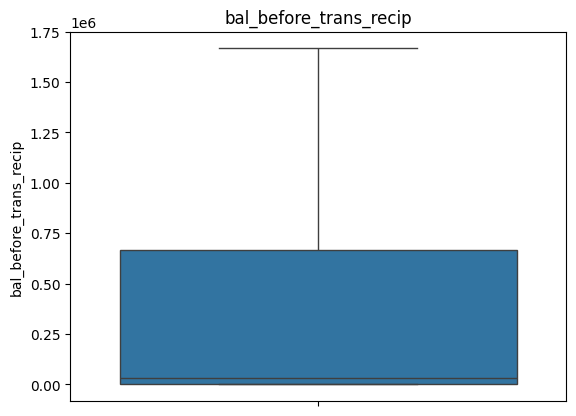

In [39]:
# revisualizing column: 'bal_before_trans_recip'
sns.boxplot(df_res['bal_before_trans_recip'])
plt.title('bal_before_trans_recip')

In [40]:
# determining the upper and lower bound for column: 'bal_before_trans_recip'
q1=df_res['bal_after_trans_recip'].quantile(0.25)
q3=df_res['bal_after_trans_recip'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower # determining the upper and lower band using inter_quartile method

(2785692.875, -1671415.7249999999)

In [41]:
# filtering outlier for column: 'bal_before_trans_recip'
bal_after_trans_recip=df_res.loc[(df_res['bal_after_trans_recip'] > upper)|(df_res['bal_after_trans_recip'] < lower)]
len(bal_after_trans_recip)

16543

In [42]:
# capping outlier for column: 'bal_before_trans_recip'
df_res.loc[(df['bal_after_trans_recip']>upper),'bal_after_trans_recip']=upper
df_res.loc[(df['bal_after_trans_recip']<lower),'bal_after_trans_recip']=lower

Text(0.5, 1.0, 'bal_after_trans_recip')

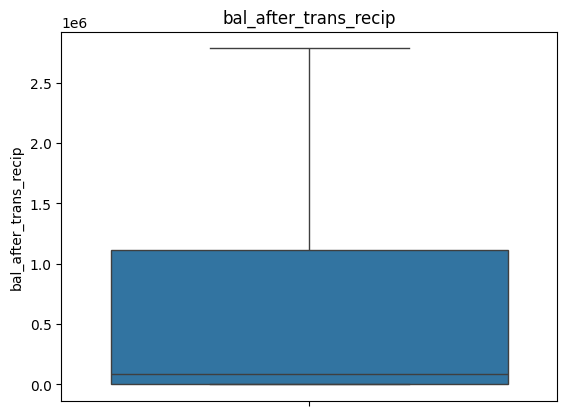

In [43]:
# revisualizing outleir for column: 'bal_after_trans_recip'
sns.boxplot(df_res['bal_after_trans_recip'])
plt.title('bal_after_trans_recip')

In [44]:
df_res['isFlaggedFraud'].unique() # exploring this column

array([0.])

In [45]:
d=df_res[df['isFlaggedFraud']==0]
len(d)

138115

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
type_lower=df_res['transaction_type'].str.lower() # converting this column to lower

In [48]:
df_res['trans_origin']=le.fit_transform(df_res['trans_origin']) # transform object values to numerical values
df_res['trans_recipient']=le.fit_transform(df_res['trans_recipient'])
df_res['transaction_type']=le.fit_transform(df_res['transaction_type'])

In [49]:
df2_corr=df_res.corr()
df2_corr # checking for correlation

,step,transaction_type,trans_amount,trans_origin,bal_before_trans,bal_after_trans,trans_recipient,bal_before_trans_recip,bal_after_trans_recip,isFraud,isFlaggedFraud
step,1.000000,-0.091272,0.106121,-0.000192,0.000823,0.005112,-0.087459,0.077016,0.072392,-0.050135,NaN
transaction_type,-0.091272,1.000000,-0.165677,0.000854,-0.334596,-0.439766,0.585785,-0.323985,-0.213734,0.014289,NaN
trans_amount,0.106121,-0.165677,1.000000,0.001022,0.005636,0.000462,-0.520581,0.456811,0.551499,0.005746,NaN
trans_origin,-0.000192,0.000854,0.001022,1.000000,-0.002399,-0.003083,0.002081,0.002043,0.002545,-0.002929,NaN
bal_before_trans,0.000823,-0.334596,0.005636,-0.002399,1.000000,0.924107,-0.116299,0.130810,0.044357,0.003056,NaN
bal_after_trans,0.005112,-0.439766,0.000462,-0.003083,0.924107,1.000000,-0.137114,0.128415,0.011126,-0.018047,NaN
trans_recipient,-0.087459,0.585785,-0.520581,0.002081,-0.116299,-0.137114,1.000000,-0.463966,-0.468808,-0.018664,NaN
bal_before_trans_recip,0.077016,-0.323985,0.456811,0.002043,0.130810,0.128415,-0.463966,1.000000,0.883822,-0.016316,NaN
bal_after_trans_recip,0.072392,-0.213734,0.551499,0.002545,0.044357,0.011126,-0.468808,0.883822,1.000000,-0.010061,NaN
isFraud,-0.050135,0.014289,0.005746,-0.002929,0.003056,-0.018047,-0.018664,-0.016316,-0.010061,1.000000,NaN


<Axes: >

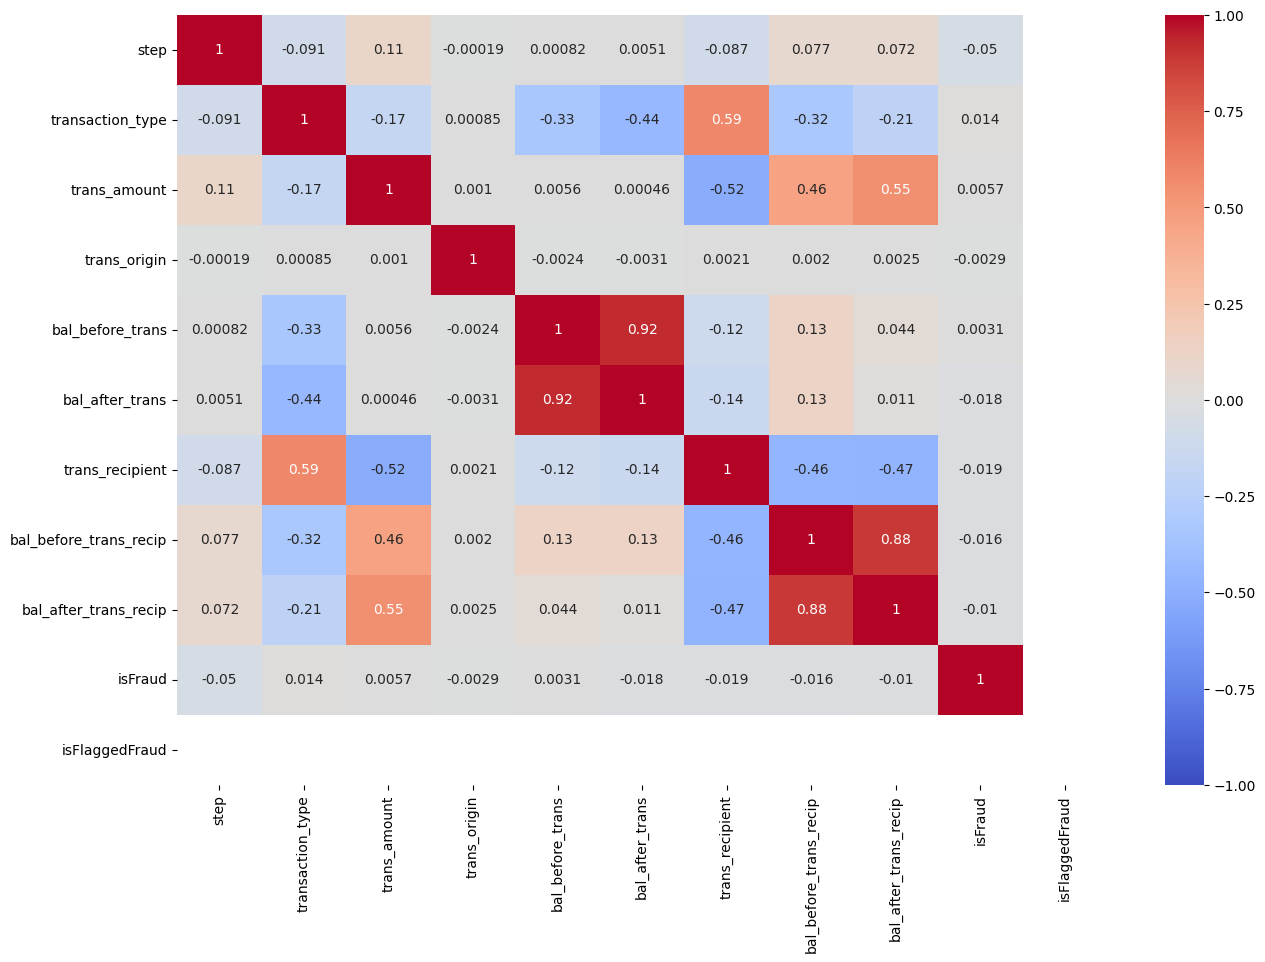

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df2_corr,annot=True,vmax=1,vmin=-1,cmap='coolwarm') # visualizing correlation

# Multicollinearity check

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
  vif_data=pd.DataFrame()
  vif_data['feature']=data.columns
  vif_data['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif_data

In [52]:
vif_data=calculate_vif(df_res)
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
5,bal_after_trans,11.652491
4,bal_before_trans,10.826798
8,bal_after_trans_recip,8.433618
0,step,7.718673
7,bal_before_trans_recip,7.607837
1,transaction_type,5.701583
6,trans_recipient,4.776422
3,trans_origin,3.664647
2,trans_amount,2.928375
9,isFraud,1.004838


In [53]:
df_res.drop(['step','bal_after_trans','bal_before_trans_recip','isFlaggedFraud'],axis=1,inplace=True)

In [54]:
# rechecking for high correlation
f=df_res.corr()

<Axes: >

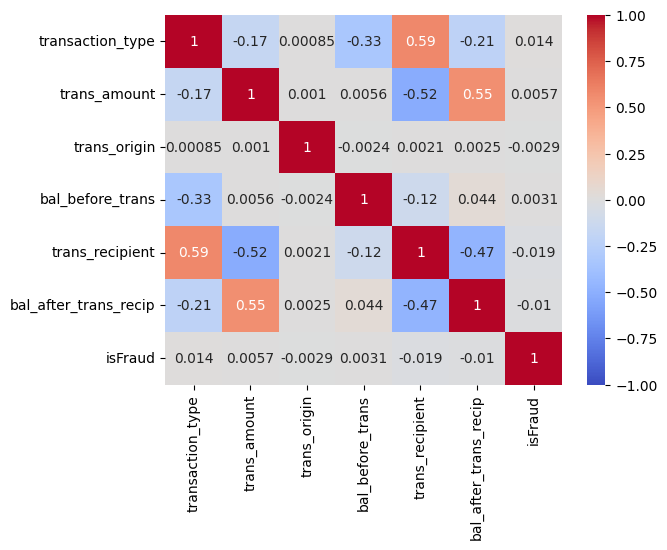

In [55]:
sns.heatmap(f,annot=True,vmax=1,vmin=-1,cmap='coolwarm')

In [56]:
df_res.describe() # statistical analysis

,transaction_type,trans_amount,trans_origin,bal_before_trans,trans_recipient,bal_after_trans_recip,isFraud
count,138115.000000,138115.000000,138115.000000,138115.000000,138115.000000,1.381150e+05,138115.000000
mean,1.826521,137517.364662,69056.365746,128838.194993,20882.882272,6.898400e+05,0.000883
std,1.350232,162925.117211,39870.108757,189540.526654,19450.845842,9.889932e+05,0.029708
min,0.000000,0.320000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,10889.575000,34528.500000,0.000000,6297.500000,0.000000e+00,0.000000
50%,1.000000,60059.550000,69056.000000,20038.000000,12649.000000,8.544306e+04,0.000000
75%,3.000000,221085.965000,103584.500000,196309.960000,33908.500000,1.114277e+06,0.000000
max,4.000000,536380.550000,138113.000000,490774.900000,68437.000000,2.785693e+06,1.000000


# feature selection and scaling

In [57]:
# feature selection
x=df_res[['transaction_type', 'trans_amount', 'trans_origin', 'bal_before_trans',
       'trans_recipient', 'bal_after_trans_recip']]

y= df_res['isFraud']


In [58]:
y.value_counts() # exploring the y values

,count
isFraud,
0.0,137993
1.0,122


In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [62]:
re=y_resampled.value_counts()
re

,count
isFraud,
0.0,137993
1.0,137993


Text(0.5, 1.0, 'resampled y')

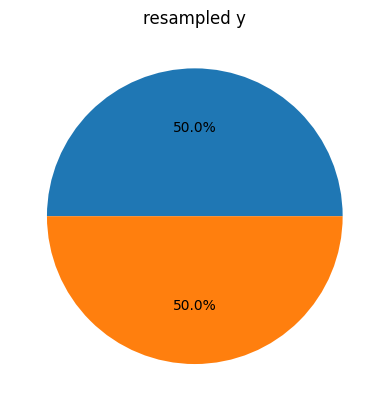

In [63]:
# visualizing the resampled y
plt.pie(re,autopct='%1.1f%%')
plt.title('resampled y')

In [64]:
# splitting the data
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [65]:
# feature scaling
scaler=StandardScaler()
x_train_v=scaler.fit_transform(x_train)
x_test_v=scaler.transform(x_test)

In [66]:
# import machine learning libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [67]:
# defining the model
tree=DecisionTreeClassifier(ccp_alpha=0.002)
knn=KNeighborsClassifier(n_neighbors=3)

In [68]:
rf=RandomForestClassifier(ccp_alpha=0.002,n_estimators=100)
log=LogisticRegression()

In [69]:

# fitting the model
tree.fit(x_train_v,y_train)
tree.score(x_train_v,y_train)

0.9488172265645219

In [70]:

# fitting knn algorithm
knn.fit(x_train_v,y_train)
knn.score(x_train_v,y_train)

0.9963196852839173

In [71]:
# fitting random forest model
rf.fit(x_train_v,y_train)
rf.score(x_train_v,y_train)

0.963258967855479

In [72]:
# fitting the losgistic algorithm
log.fit(x_train_v,y_train)
log.score(x_train_v,y_train)

0.7416170609244785

# model evaluation

In [73]:
tree_pre=tree.predict(x_test_v)
knn_pre=knn.predict(x_test_v)


In [74]:
rf_pre=rf.predict(x_test_v)
log_pre=log.predict(x_test_v)

In [75]:
print(accuracy_score(y_test,tree_pre))


0.9490917435624909


In [76]:
print(accuracy_score(y_test,knn_pre))


0.9937557369921253


In [77]:
print(accuracy_score(y_test,rf_pre))

0.9630900043480362


In [78]:

print(accuracy_score(y_test,log_pre))

0.7443958645345186


###### from the above training and evaluation, random forest algorithm is chosen, beacuse of it's high accuracy and has no traces of overfitting

In [79]:
cm=confusion_matrix(y_test,rf_pre)
cm

array([[39065,  2177],
       [  879, 40675]])

<Axes: >

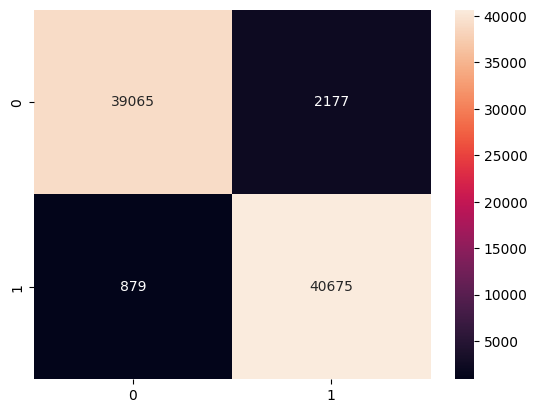

In [99]:
sns.heatmap(cm,annot=True,fmt='d') # visualizing the confusion_matrix

In [101]:
# classification report
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96     41242
         1.0       0.95      0.98      0.96     41554

    accuracy                           0.96     82796
   macro avg       0.96      0.96      0.96     82796
weighted avg       0.96      0.96      0.96     82796



In [89]:
# determing features base of their contribution to the model
fr=rf.feature_importances_
v=['transaction_type', 'trans_amount', 'trans_origin', 'bal_before_trans','trans_recipient', 'bal_after_trans_recip']

<Axes: >

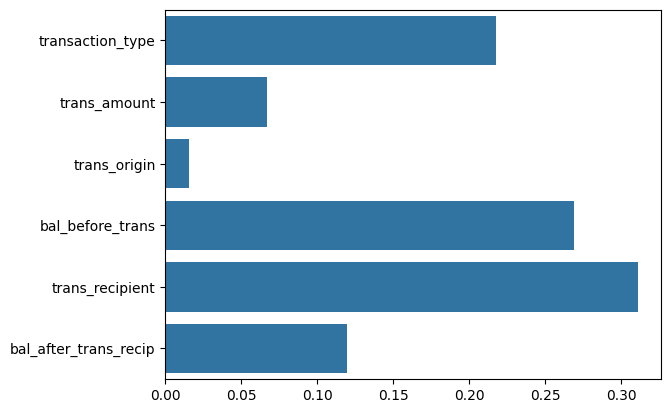

In [90]:
# visualizing features that contribute to model predictions
sns.barplot(x=fr,y=v)

###### from the above training and evaluation, random forest algorithm is chosen, beacuse it of high accuracy and has no traces of overfitting

# model validation

In [91]:
from sklearn.model_selection import KFold,cross_val_score

In [92]:
kf=KFold(n_splits=5)
score=cross_val_score(rf,x_train_v,y_train,cv=kf)

In [93]:
score #validation score

array([0.96402505, 0.96226513, 0.96345567, 0.96614732, 0.96089342])

# Model testing

In [97]:
# input_data
predictions=rf.predict(scaler.transform([[3	,9839.640000,	16372,	170136.000000	,42300,	0.000000]]))

In [98]:
# predictions output
if predictions==0:
  print('non fraud')
else:
  print('fraud')

non fraud


# Report and Explaination

In [102]:
# Question 2:
# Describe your fraud detection model in elaboration.
# I developed a fraud detection model using a Random Forest Classifier, achieving high accuracy .
# The dataset was preprocessed by handling missing values, addressing outliers, and balancing classes using SMOTE.
# Features like transaction type, amount, and balances were standardized and selected based on their importance.
# The model was validated using cross-validation and deployed to predict fraudulent transactions in real-time,
# demonstrating reliable performance without overfitting.

In [103]:
# Question3:
# How did you select variables to be included in the model?
# Variables were selected based on correlation analysis, multicollinearity checks using VIF,
# and feature importance from the Random Forest model. Additionally, domain knowledge about fraud patterns
# guided the inclusion of key variables like transaction type, amount, and account balances to enhance predictive accuracy.

In [104]:
# Question 4:
# What are the key factors that predict fraudulent customer?
# The key factors that predict fraudulent transactions include transaction type, transaction amount, balances before and after the transaction,
# and details of the transaction origin and recipient. These features capture anomalies in transaction patterns and account behaviors,
# which are strong indicators of fraud.

In [105]:
# Question 5:
# Do these factors make sense? If yes, How? If not, How not?
# Yes, these factors make sense as they align with real-world fraud patterns.
# example, unusual transaction types or amounts, significant balance changes, and suspicious origins or recipients are common indicators of fraud.
# They reflect anomalies in behavior that fraud detection models are designed to identify. therefore,
 # their effectiveness depends on data quality and the model's ability to capture relevant patterns.

In [106]:
# Question 6:
# What kind of prevention should be adopted while company update its infrastructure?
# A company should take the following measures:
# encrypting data transfers, backing up critical systems, implementing multi-factor authentication and continuously monitoring performance.
# These steps ensure a smooth transition while minimizing risks

In [108]:
# Question 7:
# To determine if the implemented prevention measures work:

# 1,Track system uptime, performance, and security incident rates before and after the update. A reduction in incidents indicates success.
# 2, Perform regular security and compliance audits to verify adherence to standards.
# 3, Simulate potential threats or disasters to ensure systems respond as expected.
# 4, Collect input from staff to assess usability and identify overlooked issues.
# 5, Monitor user activity for anomalies, indicating whether access controls and monitoring tools are effective.